<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Intrgracion_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-33-c170338cc7a8>:12: RuntimeWarning: divide by zero encountered in scalar divide
  P=(suma)/i+1


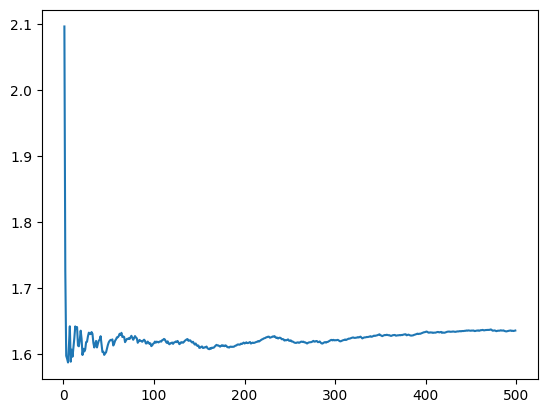

In [33]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
Lista=[]
suma=0
N=500
for i in range(N):
  u=random.uniform(0,1)
  f_x=np.sqrt(math.atan(u))
  P=(suma+f_x)/i+1
  Lista.append(P)
plt.plot(Lista)




In [34]:
Lista[-1]

1.6357551547093547